In [1]:
from pathlib import Path
from PIL import ImageDraw as PILDraw
from PIL import Image as PILImage
from cycler import cycler
from itertools import chain
import pandas as pd
import numpy as np

In [2]:
from fastai.vision import ImageDataBunch

In [3]:
PATH = Path.home()/'data'/'doodle'
PREPARED = PATH/'prepared'
TRAIN_DATA = PATH/'train'

In [4]:
RANDOM_STATE = 1

In [5]:
np.random.seed(RANDOM_STATE)

In [6]:
!ls $TRAIN_DATA

 airplane.csv		 firetruck.csv	        postcard.csv
'alarm clock.csv'	 fish.csv	        potato.csv
 ambulance.csv		 flamingo.csv	       'power outlet.csv'
 angel.csv		 flashlight.csv         purse.csv
'animal migration.csv'	'flip flops.csv'        rabbit.csv
 ant.csv		'floor lamp.csv'        raccoon.csv
 anvil.csv		 flower.csv	        radio.csv
 apple.csv		'flying saucer.csv'     rainbow.csv
 arm.csv		 foot.csv	        rain.csv
 asparagus.csv		 fork.csv	        rake.csv
 axe.csv		 frog.csv	       'remote control.csv'
 backpack.csv		'frying pan.csv'        rhinoceros.csv
 banana.csv		 garden.csv	        river.csv
 bandage.csv		'garden hose.csv'      'roller coaster.csv'
 barn.csv		 giraffe.csv	        rollerskates.csv
'baseball bat.csv'	 goatee.csv	        sailboat.csv
 baseball.csv		'golf club.csv'         sandwich.csv
 basketball.csv		 grapes.csv	        saw.csv
 basket.csv		 grass.csv	        saxophone.csv
 bat.csv		 guitar.csv	       'school bus.csv'
 bathtub.csv		 hamburger.csv	    

In [9]:
def to_tuples(segments):
    return list(chain(*[zip(*segment) for segment in eval(segments)]))

In [19]:
n = 100
records = []
for path in TRAIN_DATA.glob('*.csv'):
    df = pd.read_csv(path)
    subset = df[df.recognized].sample(n, random_state=RANDOM_STATE).copy()
    subset['joined'] = subset.drawing.map(to_tuples)
    subset.drop(columns=['countrycode', 'drawing', 'timestamp', 'recognized'], inplace=True)
    records.extend(subset.to_dict('records'))

In [20]:
data = pd.DataFrame(records)

In [21]:
data.sample(10)

,joined,key_id,word
32633,"[(20, 1), (16, 3), (11, 19), (9, 68), (14, 76)...",5615692126617600,trumpet
24987,"[(52, 44), (87, 32), (117, 29), (146, 31), (17...",4642463656443904,cow
18633,"[(0, 215), (3, 179), (10, 187), (16, 211), (10...",5249494729883648,animal migration
10198,"[(132, 255), (134, 251), (134, 122), (138, 77)...",5749261050314752,palm tree
16042,"[(118, 95), (116, 89), (115, 33), (120, 14), (...",5831840231325696,dog
29125,"[(9, 126), (0, 228), (0, 236), (6, 240), (26, ...",6043171932864512,screwdriver
28058,"[(143, 6), (87, 7), (61, 18), (23, 42), (6, 64...",5964064356302848,basketball
21541,"[(65, 0), (70, 81), (70, 212), (23, 221), (0, ...",5555915174445056,hockey stick
23388,"[(119, 217), (72, 216), (27, 196), (8, 183), (...",6707869829300224,apple
21053,"[(0, 6), (41, 10), (195, 11), (255, 1), (251, ...",4854348578291712,line


In [14]:
basket = pd.read_csv(TRAIN_DATA/'basket.csv')

In [15]:
basket.shape

(118458, 6)

In [27]:
def to_tuples(segments):
    return list(chain(*[zip(*segment) for segment in eval(segments)]))

In [53]:
basket.drawing[:10].map(to_tuples)

0    [(3, 14), (40, 150), (185, 151), (191, 148), (...
1    [(180, 14), (131, 0), (96, 0), (49, 20), (7, 4...
2    [(255, 102), (241, 100), (161, 105), (45, 91),...
3    [(70, 116), (67, 63), (73, 35), (81, 22), (94,...
4    [(0, 146), (0, 189), (3, 220), (6, 222), (100,...
5    [(19, 104), (71, 33), (87, 18), (120, 3), (156...
6    [(105, 15), (98, 13), (72, 20), (46, 34), (33,...
7    [(17, 144), (34, 249), (60, 247), (83, 238), (...
8    [(27, 141), (28, 122), (35, 101), (51, 54), (6...
9    [(40, 120), (128, 106), (207, 105), (237, 115)...
Name: drawing, dtype: object

In [54]:
basket.head(2)

,countrycode,drawing,key_id,recognized,timestamp,word
0,US,"[[[3, 40, 185, 191, 196, 203, 249], [14, 150, ...",6700773268258816,True,2017-03-12 01:17:43.217220,basket
1,DE,"[[[180, 131, 96, 49, 7, 3, 6, 12, 42, 64, 92, ...",5328028487909376,True,2017-03-21 15:42:11.814440,basket


In [50]:
items = list(chain(*basket.drawing[:10].map(to_tuples).tolist()))

In [52]:
len(items), len(set(items))

(494, 488)

In [22]:
list(chain(*[zip(*segment) for segment in eval(basket.drawing[20])]))

[(11, 97),
 (8, 163),
 (15, 232),
 (22, 253),
 (170, 219),
 (210, 224),
 (190, 170),
 (180, 123),
 (180, 91),
 (175, 83),
 (134, 91),
 (57, 97),
 (47, 102),
 (8, 109),
 (0, 90),
 (2, 60),
 (11, 40),
 (41, 10),
 (63, 0),
 (104, 4),
 (153, 23),
 (164, 34),
 (178, 66),
 (185, 93),
 (165, 94),
 (157, 87),
 (142, 51),
 (124, 36),
 (102, 35),
 (61, 43),
 (50, 47),
 (27, 78),
 (15, 98),
 (13, 107),
 (15, 108),
 (17, 114),
 (44, 122),
 (103, 151),
 (212, 221),
 (30, 111),
 (46, 111),
 (86, 122),
 (116, 139),
 (184, 167),
 (196, 175),
 (71, 94),
 (108, 115),
 (194, 148),
 (128, 90),
 (198, 136),
 (16, 125),
 (46, 149),
 (91, 178),
 (123, 208),
 (177, 237),
 (7, 157),
 (71, 195),
 (118, 218),
 (137, 231),
 (11, 197),
 (65, 224),
 (95, 244),
 (28, 237),
 (61, 246),
 (76, 96),
 (24, 139),
 (10, 168),
 (101, 106),
 (107, 97),
 (102, 99),
 (88, 111),
 (34, 185),
 (14, 219),
 (8, 241),
 (158, 93),
 (130, 103),
 (71, 164),
 (44, 199),
 (26, 237),
 (170, 88),
 (147, 119),
 (104, 165),
 (37, 254),
 (186

In [17]:
basket.drawing[:10].map(eval).map(to_tuples)

0    [[[3, 40, 185, 191, 196, 203, 249], [14, 150, ...
1    [[[180, 131, 96, 49, 7, 3, 6, 12, 42, 64, 92, ...
2    [[[255, 241, 161, 45, 22, 15, 11, 8, 12, 23, 7...
3    [[[70, 67, 73, 81, 94, 118, 129, 134, 143, 143...
4    [[[0, 0, 3, 6, 100, 248, 237, 230], [146, 189,...
5    [[[19, 71, 87, 120, 156, 168, 186, 207, 223, 2...
6    [[[105, 98, 72, 46, 33, 14, 10, 12, 36, 48, 77...
7    [[[17, 34, 60, 83, 156, 230, 254, 239, 225, 20...
8    [[[27, 28, 35, 51, 64, 82, 108, 130, 157, 196,...
9    [[[40, 128, 207, 237, 241, 239, 224, 181, 106,...
Name: drawing, dtype: object

In [16]:
basket.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,US,"[[[3, 40, 185, 191, 196, 203, 249], [14, 150, ...",6700773268258816,True,2017-03-12 01:17:43.217220,basket
1,DE,"[[[180, 131, 96, 49, 7, 3, 6, 12, 42, 64, 92, ...",5328028487909376,True,2017-03-21 15:42:11.814440,basket
2,PH,"[[[255, 241, 161, 45, 22, 15, 11, 8, 12, 23, 7...",5649962526310400,True,2017-03-18 08:20:41.457080,basket
3,TH,"[[[70, 67, 73, 81, 94, 118, 129, 134, 143, 143...",5991135019270144,True,2017-01-28 13:41:32.059050,basket
4,GB,"[[[0, 0, 3, 6, 100, 248, 237, 230], [146, 189,...",6745972837187584,True,2017-01-26 22:46:12.791720,basket


In [71]:
canvas = PILImage.new('RGB', (256, 256), color='white')
draw = PILDraw.Draw(canvas)
from itertools import cycle
colors = cycle(['#0095EF', '#3C50B1', '#6A38B3', '#A224AD', '#F31D64', '#FE433C'])

for segment, color in zip(eval(basket['drawing'][20]), colors):
    xs, ys = segment
    prev_pts = zip(xs[:-1], ys[:-1])
    next_pts = zip(xs[1:], ys[1:])
    for (x1, y1), (x2, y2) in zip(prev_pts, next_pts):
        draw.line((x1, y1, x2, y2), fill=color, width=2)

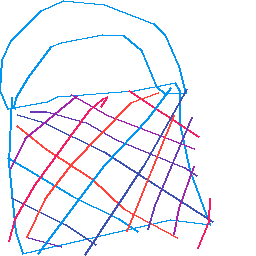

In [72]:
canvas